In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
with open("../tracker_stubs/ball_detections.pkl","rb") as f:
    ball_positions = pickle.load(f)
    
ball_positions
    

[{},
 {},
 {},
 {},
 {},
 {},
 {1: [821.7343139648438,
   687.1528930664062,
   837.7798461914062,
   704.124755859375]},
 {1: [813.3272094726562,
   694.1710205078125,
   831.4678344726562,
   715.040283203125]},
 {1: [797.3014526367188,
   718.7648315429688,
   813.9695434570312,
   737.7122192382812]},
 {},
 {1: [769.345458984375,
   759.4305419921875,
   788.0614013671875,
   778.8507080078125]},
 {1: [777.5445556640625, 717.6396484375, 796.564453125, 738.513671875]},
 {1: [787.8751831054688,
   669.9548950195312,
   807.1327514648438,
   691.8953247070312]},
 {1: [795.9635009765625,
   646.8468627929688,
   812.9014892578125,
   665.8931274414062]},
 {},
 {1: [814.9255981445312,
   569.4874877929688,
   831.3133544921875,
   586.7671508789062]},
 {1: [818.2452392578125,
   550.7135009765625,
   836.1187133789062,
   570.3316040039062]},
 {1: [826.6677856445312, 522.1129760742188, 842.89990234375, 537.9189453125]},
 {},
 {},
 {},
 {},
 {},
 {1: [864.5260620117188,
   402.0079650878

In [20]:
ball_positions_filtered = [x.get(1, []) if isinstance(x, dict) else [] for x in ball_positions]
ball_positions_filtered

# DataFrame'e dönüştürme
df_ball_positions = pd.DataFrame(ball_positions_filtered, columns=['x1', 'y1', 'x2', 'y2'])

# Eksik değerleri doldurmak için interpolate ve backward fill kullanıyoruz
df_ball_positions = df_ball_positions.interpolate()  # Aradaki boşlukları doldurur
df_ball_positions = df_ball_positions.bfill()        # Baştaki boşlukları doldurur

# DataFrame'i kontrol edelim
print(df_ball_positions)

              x1          y1           x2          y2
0     821.734314  687.152893   837.779846  704.124756
1     821.734314  687.152893   837.779846  704.124756
2     821.734314  687.152893   837.779846  704.124756
3     821.734314  687.152893   837.779846  704.124756
4     821.734314  687.152893   837.779846  704.124756
..           ...         ...          ...         ...
209  1184.412964  248.624954  1199.054077  265.774689
210  1183.796997  233.344391  1196.418091  245.940216
211  1182.622559  225.496277  1196.799561  241.859818
212  1179.966431  213.547134  1194.774658  228.975830
213  1179.353149  203.490524  1192.797119  218.501373

[214 rows x 4 columns]


In [21]:
df_ball_positions["mid_y"] = (df_ball_positions["y1"]+df_ball_positions["y2"])/2
df_ball_positions["mid_y_rolling_mean"] = df_ball_positions["mid_y"].rolling(window=5,min_periods=1,center=False).mean()

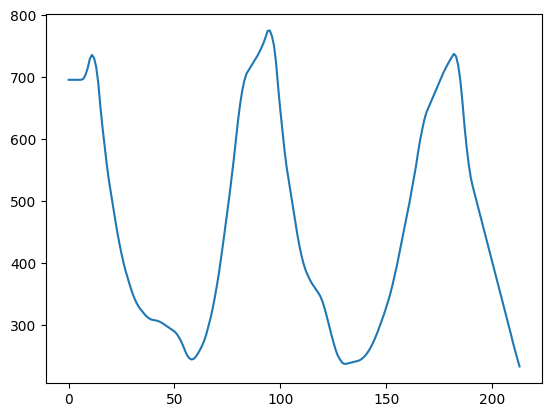

In [22]:
plt.plot(df_ball_positions["mid_y_rolling_mean"])

In [23]:
df_ball_positions["delta_y"] = df_ball_positions["mid_y_rolling_mean"].diff()

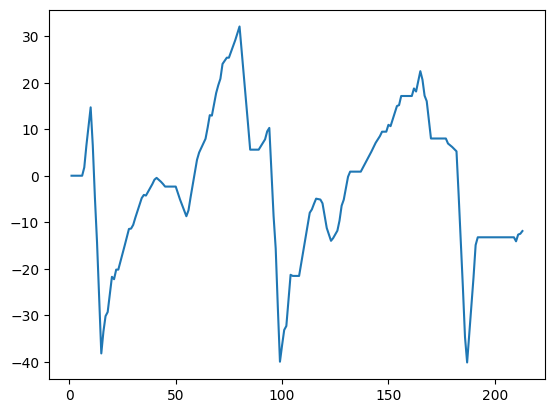

In [24]:
plt.plot(df_ball_positions["delta_y"])

In [25]:
df_ball_positions['ball_hit']=0

In [26]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

C:\Users\bedir\AppData\Local\Temp\ipykernel_18308\3752280353.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\bedir\AppData\Local\Temp\ipykernel_18308\3752280353.py:18: SettingWithCopyWa

In [27]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,821.734314,687.152893,837.779846,704.124756,695.638824,695.638824,NaN,0
1,821.734314,687.152893,837.779846,704.124756,695.638824,695.638824,0.000000,0
2,821.734314,687.152893,837.779846,704.124756,695.638824,695.638824,0.000000,0
3,821.734314,687.152893,837.779846,704.124756,695.638824,695.638824,0.000000,0
4,821.734314,687.152893,837.779846,704.124756,695.638824,695.638824,0.000000,0
...,...,...,...,...,...,...,...,...
209,1184.412964,248.624954,1199.054077,265.774689,257.199821,283.674565,-13.237372,0
210,1183.796997,233.344391,1196.418091,245.940216,239.642303,269.573164,-14.101401,0
211,1182.622559,225.496277,1196.799561,241.859818,233.678047,256.926386,-12.646778,0
212,1179.966431,213.547134,1194.774658,228.975830,221.261482,244.443769,-12.482616,0


In [28]:
df_ball_positions[df_ball_positions['ball_hit']==1]


,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.544556,717.639648,796.564453,738.513672,728.076660,735.750208,6.487567,1
58,925.472192,241.434830,938.762793,254.691473,248.063152,243.888905,-1.916554,1
95,624.201447,748.847382,641.788635,767.175415,758.011398,775.300381,0.816745,1
131,717.300684,231.292017,731.137891,245.602158,238.447087,236.698691,-0.232250,1
182,1296.758423,740.293640,1313.070557,758.038208,749.165924,737.527448,5.247198,1
